<a href="https://colab.research.google.com/github/Mdawood1122/MSC-Dissertation/blob/main/dissertation_churn_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
import time

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/churn_t.csv")   # read CSV file
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
df.info()                           # show information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
df['Churn'].value_counts()          # number of samples for both labels

0    2850
1     483
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

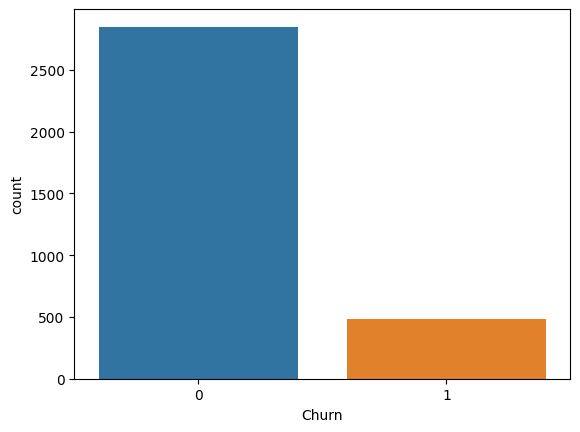

In [ ]:
import seaborn as sb
sb.countplot(x='Churn',data=df)

In [ ]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [ ]:
X = df.drop(columns = ['Churn'])                      # assign all features to X and drop 'Churn' variable
y = df['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # split data into training and testing 30% and 70% respectively

**Model accuracy at Default hyperparameters**

In [ ]:
RFC = RandomForestClassifier()               # creation of Random Forest model
RFC_churn=RFC.fit(X_train, y_train)
RFC_churn.score(X_test,y_test)               #evalution of model on test dataset

0.941

In [ ]:
svm_classi = svm.SVC()                       #creation of SVC model
SVC_churn=svm_classi.fit(X_train, y_train)
SVC_churn.score(X_test,y_test)               # Evalution of model on test dataset

0.852

In [ ]:
knn = KNeighborsClassifier()                 # Create model KNN
KNN_churn=knn.fit(X_train,y_train)           # train model on the traning dataset
KNN_churn.score(X_test,y_test)               #evaluate model on the test dataset

0.867

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.4 MB/s eta 0:00:00


**Bayesian Search for RFC**

In [ ]:
from skopt import BayesSearchCV
param_space = {
    'n_estimators': (50, 500),             # Number of trees in the forest
    'max_features': (0.1, 0.9),            # features consider at each split
    'min_samples_split': (2, 20),          # Minimum number of samples
    'min_samples_leaf': (1, 20),           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]             # bootstrap samples used or not used when building trees
}
start_time=time.time()                     # start timer
opt_bay_RFC = BayesSearchCV(RFC_churn, param_space, n_iter=60, cv=5)   #Bayesian Optimization
opt_bay_RFC.fit(X_train, y_train)                  # train model on the training dataset
end_time = time.time()                     # end timer
execution_time = end_time - start_time     # total execution time of algorithm
best_params = opt_bay_RFC.best_params_             #best parameter value
best_model = opt_bay_RFC.best_estimator_
test_accuracy = best_model.score(X_test, y_test)   #testing of model on test dataset
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

Test accuracy: 0.94
Time taken (in seconds): 757.2147288322449


**Bayesian Search for SVC**

In [ ]:
from skopt import BayesSearchCV
param_space = {
    'C': (0.1, 1.0, 'log-uniform'),         # Smaller range for C
    'kernel': ['linear', 'rbf'],
    'gamma': (1e-6, 1e-2, 'log-uniform')    # Smaller range for gamma
}
start_time = time.time()
opt = BayesSearchCV(SVC_churn, param_space, n_iter=10, cv=5, n_jobs=-1)  #Bayesian optimization
opt.fit(X_train, y_train)                                                #training of model on train dataset
end_time = time.time()
execution_time = end_time - start_time      #time taken by the algorithm in execution
best_params = opt.best_params_              #best hyperparameters values
best_model = opt.best_estimator_
test_accuracy = best_model.score(X_test, y_test) #Evaluaiton of the model on the test dataset
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

Test accuracy: 0.88
Time taken (in seconds): 969.1032738685608


**Bayesian Search for KNN**

In [ ]:
from skopt import BayesSearchCV
param_space = {
    'n_neighbors': (1, 35),              # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'p': (1, 2)                          # Power parameter (1 for Manhattan, 2 for Euclidean)
}
start_time = time.time()                 #start timer
opt = BayesSearchCV(KNN_churn, param_space, n_iter=50, cv=5)  #Bayesian Optimiztion
opt.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time   #execution time of beyesian optimiztion
best_params = opt.best_params_
best_model = opt.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print('Best Hyperparameters:', best_params)
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best Hyperparameters: OrderedDict([('n_neighbors', 33), ('p', 1), ('weights', 'distance')])
Test accuracy: 0.882
Time taken (in seconds): 100.45501685142517


**Random search for RFC**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),          # Number of trees
    'max_features': np.arange(0.1, 1.0, 0.1),           # Fraction of features to consider at each split
    'min_samples_split': np.arange(2, 21, 2),           # Minimum number of samples
    'min_samples_leaf': np.arange(1, 21, 2),            # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                          # Whether bootstrap samples used or not used
}
start_time=time.time()
random_search = RandomizedSearchCV(RFC_churn, param_distributions=param_dist, n_iter=25, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time
best_params = random_search.best_params_
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)        # Evaluate the best model on the test data
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

Test accuracy: 0.949
Time taken (in seconds): 260.4715721607208


**Random search for SVC**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_dist = {
    'C': uniform(0.1, 2.0),                       # range of C
    'kernel': ['linear', 'rbf'],
    'gamma': uniform(0.001, 0.01)
}
start_time = time.time()
random_search = RandomizedSearchCV(SVC_churn, param_distributions=param_dist, n_iter=10, cv=5) #Random Search
random_search.fit(X_train, y_train)               #training
end_time = time.time()
execution_time = end_time - start_time
best_params = random_search.best_params_          #best hyperparameter value
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)  # Evaluate the best model on the test data
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

Test accuracy: 0.877
Time taken (in seconds): 1347.0649192333221


**Random search for KNN**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform  # For defining hyperparameter ranges
param_dist = {
    'n_neighbors': randint(1,50 ),         # Number of neighbors to consider
    'weights': ['uniform', 'distance'],    # Weight function
    'p': [1, 2]                            # Power parameter
}
start_time = time.time()
random_search = RandomizedSearchCV(KNN_churn, param_distributions=param_dist, n_iter=50, cv=20) #creation of randmo search alogirthm
random_search.fit(X_train, y_train)        #trainin on training dataset
end_time = time.time()
execution_time = end_time - start_time     #execution time of RS algorithm
best_params = random_search.best_params_   #best hyperparameter values
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test) #evaluation of model on test set
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

Test accuracy: 0.882
Time taken (in seconds): 15.461910486221313


**Grid Search for RFC**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_dist = {
    'n_estimators': [100, 200, 400],                    # Number of trees in the forest
    'max_features': np.arange(0.1, 0.5, 0.1),           # Fraction of features to consider at each split
    'min_samples_split': [2, 5, 10],                    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 5, 10],                     # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                          # bootstrap samples are used or not used
}
start_time = time.time()
grid_search = GridSearchCV(RFC_churn, param_dist, cv=5, n_jobs=-1)            #Grid search
grid_search.fit(X_train, y_train)                       #training of grid search
end_time = time.time()
execution_time = end_time - start_time                  #total execution time of Grid search
best_params = grid_search.best_params_                  #best hyperparameters value
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)        #evalution on test dataset
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

Test accuracy: 0.949
Time taken (in seconds): 904.2938778400421


**Grid Search for SVC**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 'scale', 'auto']
}
start_time = time.time()
grid_search = GridSearchCV(SVC_churn, param_grid, cv=5)        #Grid search
grid_search.fit(X_train, y_train)                              #training of model
end_time = time.time()
execution_time = end_time - start_time
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

Test accuracy: 0.881
Time taken (in seconds): 3631.5851790905


**Grid Search for KNN**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 50),         #Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'p': [1, 2]                          # Power parameter
}
start_time = time.time()
grid_search = GridSearchCV(KNN_churn, param_grid, cv=5)  #grid search
grid_search.fit(X_train, y_train)        #training of model
end_time = time.time()
execution_time = end_time - start_time
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

Test accuracy: 0.883
Time taken (in seconds): 31.06301212310791


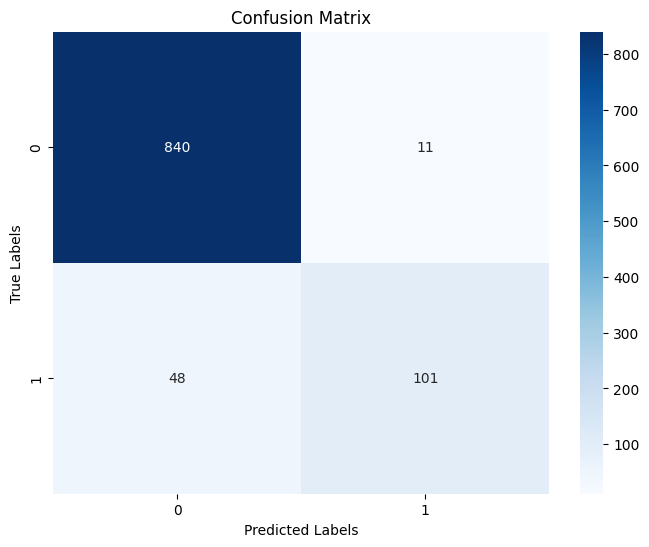

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       851
           1       0.90      0.68      0.77       149

    accuracy                           0.94      1000
   macro avg       0.92      0.83      0.87      1000
weighted avg       0.94      0.94      0.94      1000



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Make predictions on the test data
y_pred = RFC.predict(X_test)

# 2. Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# 4. Show the classification report
print(classification_report(y_test, y_pred))